<a href="https://colab.research.google.com/github/henrygas/tensorflow_2_learn/blob/master/tensorflow_homework_senior_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.logging.set_verbosity(tf.logging.INFO)
print(tf.__version__)
print(np.__version__)

1.15.0-rc3
1.16.5


In [0]:
mnist = input_data.read_data_sets("./")
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
print(mnist.validation.images.shape)
print(mnist.validation.labels.shape)
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000,)
(5000, 784)
(5000,)
(10000, 784)
(10000,)


In [0]:
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("int64", [None])
learning_rate = tf.placeholder("float")

L1_units_count = 600
L2_units_count = 100
L3_units_count = 10

min_val = -1
max_val = 1

W_1 = tf.Variable(tf.truncated_normal([784, L1_units_count], stddev=0.1))
b_1 = tf.Variable(tf.truncated_normal([L1_units_count], stddev=0.1))
logits_1 = tf.matmul(x, W_1) + b_1
output_1 = tf.nn.relu(logits_1)

W_2 = tf.Variable(tf.truncated_normal([L1_units_count, L2_units_count], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal([L2_units_count], stddev=0.1))
logits_2 = tf.matmul(output_1, W_2) + b_2
output_2 = tf.nn.relu(logits_2)

W_3 = tf.Variable(tf.truncated_normal([L2_units_count, L3_units_count], stddev=0.1))
b_3 = tf.Variable(tf.truncated_normal([L3_units_count], stddev=0.1))
logits_3 = tf.matmul(output_2, W_3) + b_3

logits = logits_3

cross_entropy_loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy_loss)

pred = tf.nn.softmax(logits)
correct_pred = tf.equal(tf.argmax(pred, 1), y)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

batch_size = 16
max_train_step = 10000
print("max_train_step:", max_train_step)
learning_rate_value = 0.1
max_try_times = 3
saver = tf.train.Saver()

acc_validation_max = 0

loss_array = list()

try_times = 0
while try_times < max_try_times:
  try_times += 1
  with tf.Session() as ses:
    ses.run(tf.global_variables_initializer())
    for i in range(max_train_step):
      xs, ys = mnist.train.next_batch(batch_size)
      _, loss = ses.run([optimizer, cross_entropy_loss],
                feed_dict={
                    x: xs,
                    y: ys,
                    learning_rate: learning_rate_value
                })

      if try_times == 1:
        loss_array.append(loss)

      if i % int(max_train_step / 10) == 0:
        print("loss[{}]={}".format(i, loss))

    acc_validation = ses.run(accuracy, feed_dict={
        x: mnist.validation.images,
        y: mnist.validation.labels
    })
    if acc_validation > acc_validation_max:
      acc_validation_max = acc_validation
      saver.save(ses, "./validation_model.ckpt")

    print("The {} th times of training is over. loss:{}, acc_validation:{}\n".format(try_times, loss, acc_validation))
    
# using model to run
with tf.Session() as ses:
  saver.restore(ses, "./validation_model.ckpt")
  acc_train = ses.run(accuracy, feed_dict={
      x: mnist.train.images,
      y: mnist.train.labels
  })
  acc_validation = ses.run(accuracy, feed_dict={
      x: mnist.validation.images,
      y: mnist.validation.labels
  })
  acc_test = ses.run(accuracy, feed_dict={
      x: mnist.test.images,
      y: mnist.test.labels
  })
  print("using validation_model.ckpt, acc_train:{}, acc_validation:{}, acc_test:{}".format(acc_train, acc_validation, acc_test))

max_train_step: 10000
loss[0]=2.4676082134246826
loss[1000]=0.2123345136642456
loss[2000]=0.15514995157718658
loss[3000]=0.21936194598674774
loss[4000]=0.01373111829161644
loss[5000]=0.4577820301055908
loss[6000]=0.10525079071521759
loss[7000]=0.06906004250049591
loss[8000]=0.02499786578118801
loss[9000]=0.0032645384781062603
The 1 th times of training is over. loss:0.14368049800395966, acc_validation:0.9782000184059143

loss[0]=2.673900604248047
loss[1000]=0.05248703435063362
loss[2000]=0.026685312390327454
loss[3000]=0.004341126419603825
loss[4000]=0.021512897685170174
loss[5000]=0.004233694635331631
loss[6000]=0.015663931146264076
loss[7000]=0.05983118340373039
loss[8000]=0.03159569203853607
loss[9000]=0.007317689247429371
The 2 th times of training is over. loss:0.006137462332844734, acc_validation:0.9800000190734863

loss[0]=2.6177239418029785
loss[1000]=0.22248168289661407
loss[2000]=0.0587475411593914
loss[3000]=0.2872404456138611
loss[4000]=0.06137046962976456
loss[5000]=0.2138

[   0    1    2 ... 9997 9998 9999]
[2.4676082  2.1564455  2.3902788  ... 0.0464793  0.04577263 0.1436805 ]


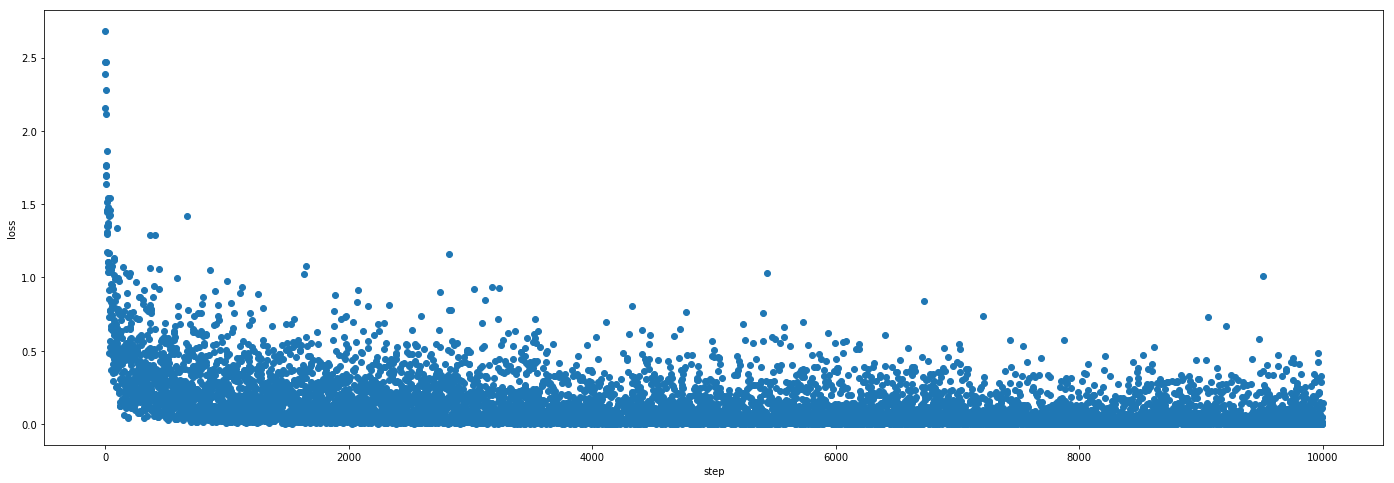

In [0]:
steps = []
for i in range(len(loss_array)):
  steps.append(i)
  
x_array = np.array(steps)
print(x_array)

y_array = np.array(loss_array)
print(y_array)

plt.figure(figsize=(24, 8))
plt.xlabel("step")
plt.ylabel("loss")
plt.scatter(x_array, y_array)

In [0]:
with tf.Session() as ses:
  saver.restore(ses, "./validation_model.ckpt")
  acc_train = ses.run(accuracy, feed_dict={
      x: mnist.train.images,
      y: mnist.train.labels
  })
  acc_validation = ses.run(accuracy, feed_dict={
      x: mnist.validation.images,
      y: mnist.validation.labels
  })
  acc_test = ses.run(accuracy, feed_dict={
      x: mnist.test.images,
      y: mnist.test.labels
  })
  print("using validation_model.ckpt, acc_train:{}, acc_validation:{}, acc_test:{}".format(acc_train, acc_validation, acc_test))

INFO:tensorflow:Restoring parameters from ./validation_model.ckpt
using validation_model.ckpt, acc_train:0.9880545735359192, acc_validation:0.9800000190734863, acc_test:0.9729999899864197


## 影响模型的因素主要有
1. 神经网络隐层数
2. 神经网络隐层内节点数
3. 初始化权重矩阵
4. 损失函数选择
5. 优化器选择
6. 学习率
7. mini-batch SGD中batch_size的选取
8. 迭代step数的选取
9. 正则项

## 调参过程，就从这些方面进行尝试
+ 1,2代表模型的复杂度，值越大，越能拟合训练集，让训练结果从欠拟合向过拟合的方向前进。L1隐层用来提取输入层特征，对于图像数据而言，L1隐层的节点数最好设置较大，接近图像的分辨率，这样可以最大限度的提取图像详细特征, 这里设置了600; L2隐层节点数可以设定的稍小一些，这里设置了100；L3层为输出层<br/>
+ 3影响了模型的初始状态，它的设定很重要，对结果影响比较大，这里选择了带截距的正态分布取值，取值范围在$2 \sigma$范围内.<br/>
+ 4损失函数选择了交叉熵损失函数，比较适合多分类问题，对结果进行softmax处理，就得到属于每个分类的概率。<br/>
+ 5优化器选择了SGD, 每次送入一小批量的训练数据用来训练，根据前馈计算得出loss, 再通过反向传播得到一次权重更新。
+ 6学习率learning_rate的设置，影响了到达最优值的速度，值设置的越小，模型收敛的越慢，越可能找到最优值的精确位置，但如果设置的过小，就有可能陷入局部最优了。一般取值0.001, 0.01, 0.1, 0.5, 1， 这里经过反复测试，确定取值为0.1时，可以得到较好的结果。
+ 7batch-size的选取，这里选择了16，据说要选择2的指数的值，便于提高效率。
+ 8迭代step数的选取，这是很重要的数据，最终将准确率从96%提升到98%以上，有赖于将这个参数放大，它放大后，相当于对训练集的训练过程，持续了超过1个epoch，这样相当于变相增加了数据集的大小，可以得到较好的结果。
+ 9正则项，用来防止模型发生过拟合的情况，即训练集上的准确度很高，但在测试集上表现糟糕的情况。